In [2]:
#Thư viện
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.cm        as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections          import Counter

***IRIS SEGMENTATION WITH MEAN SHIFT CLUSTERING***

In [3]:
data = pd.read_csv('D:\Study\School\Machine Learning\Data\Iris.csv')
data.head()
# Chỉ lấy các đặc trưng số để gom cụm
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
print('Dữ liệu đầu vào:')
print(X.head())

## Quan sát phân bố Species thực tế
print('\nPhân bố Species thực tế:')
print(data.groupby('Species').size())

Dữ liệu đầu vào:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Phân bố Species thực tế:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [4]:
X = pd.get_dummies(X, drop_first= True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
bandwidth = estimate_bandwidth(X, quantile= 0.2, n_samples= len(X))
print(bandwidth)

0.9126432980823939


In [6]:
msc = MeanShift(bandwidth= bandwidth, bin_seeding= True)
msc.fit(X)

MeanShift(bandwidth=np.float64(0.9126432980823939), bin_seeding=True)

In [7]:
labels = msc.labels_
cluster_label = np.unique(labels)
#n_clusters = len(set(labels))
n_clusters = len(cluster_label)
centroids = msc.cluster_centers_
print(centroids)
n_clusters

[[6.28301887 2.88679245 4.90754717 1.7       ]
 [4.97391304 3.39130435 1.47391304 0.24130435]]


2

In [8]:
data['cluster'] = msc.labels_

print('Kích thước các clusters: ', Counter(msc.labels_))
print('Clusters lớn nhất: ', Counter(msc.labels_).most_common(1))
data.head(50)

Kích thước các clusters:  Counter({np.int64(0): 98, np.int64(1): 52})
Clusters lớn nhất:  [(np.int64(0), 98)]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


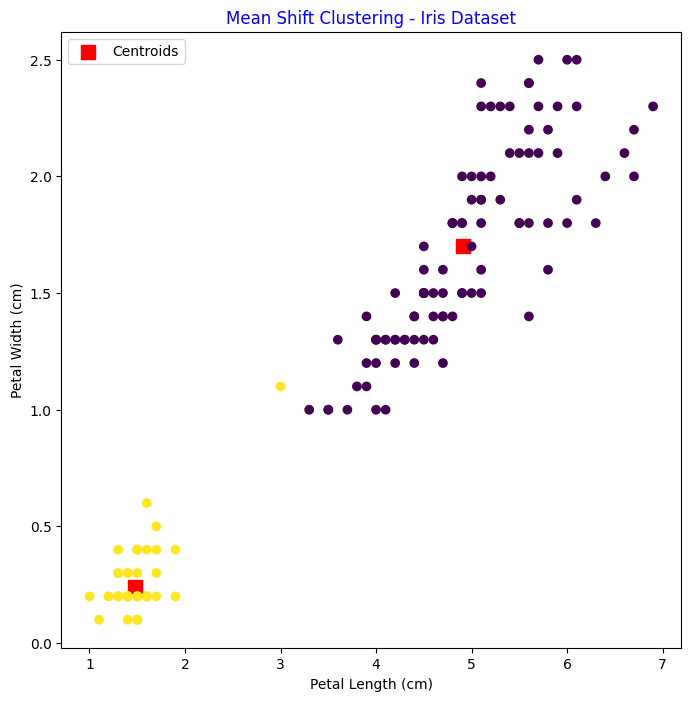

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(msc.cluster_centers_[:, 2], msc.cluster_centers_[:, 3], 
            marker='s', s=100, color='red', label='Centroids')
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=data['cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Mean Shift Clustering - Iris Dataset', color='blue')
plt.legend()
plt.show()

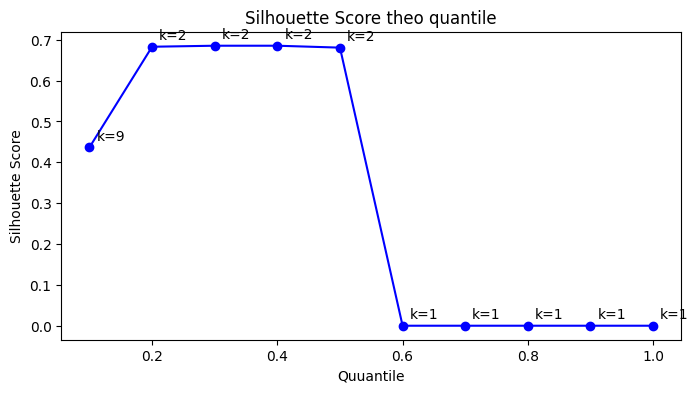

Quantile tối ưu: 0.3


In [10]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
silhouettes = []
n_clusters_list = []

for q in quantiles:
    bandwidth = estimate_bandwidth(X, quantile= q, n_samples= len(X))
    model = MeanShift(bandwidth= bandwidth, bin_seeding= True)
    model.fit(X)
    n_clusters = len(np.unique(model.labels_))
    if n_clusters > 1:
        score = silhouette_score(X, model.labels_)
        silhouettes.append(score)
        n_clusters_list.append(n_clusters)
    else:
        silhouettes.append(0)
        n_clusters_list.append(n_clusters)

plt.figure(figsize= (8, 4))
plt.plot(quantiles, silhouettes, 'bo-')
for i, txt in enumerate(n_clusters_list):
    plt.annotate(f'k={txt}', (quantiles[i], silhouettes[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Quuantile')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo quantile')
plt.show()
print(f'Quantile tối ưu: {quantiles[np.argmax(silhouettes)]}')

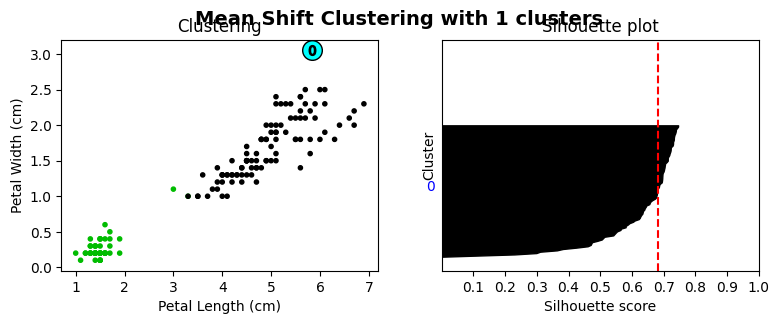

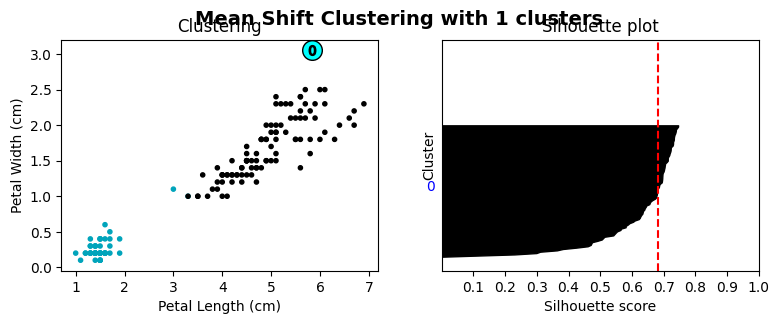

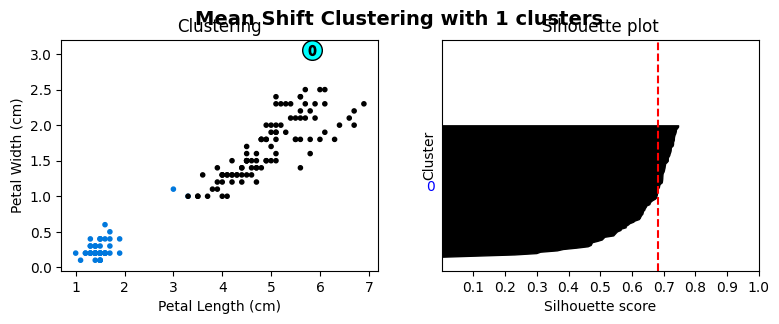

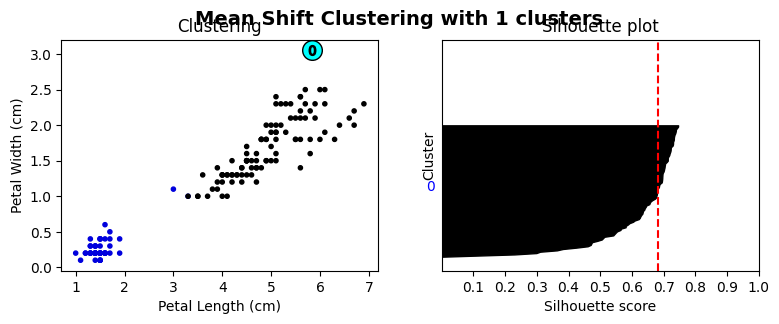

In [11]:
## Biểu diễn trực quan clustering và phân tích silhouette scores theo tham số k
## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
nbClusters = range(2, 6)
xmin       = min(silhouettes) # kết quả nhận được từ phía trên

for k in nbClusters:
    # Ước lượng bandwidth cho MeanShift
    bandwidth = estimate_bandwidth(X, quantile= q, n_samples= len(X))
    model = MeanShift(bandwidth= bandwidth, bin_seeding= True)
    model.fit(X)
    n_clusters = len(np.unique(model.labels_))

    # Biểu diễn trực quan
    fig, (ax1, ax2) = plt.subplots(1, 2) # ax1: scatter plot; ax2: Silhouette plot
    fig.set_size_inches(9, 3)

    ax1.set_title('Clustering')
    ax1.set_xlabel('Petal Length (cm)')
    ax1.set_ylabel('Petal Width (cm)')

    colors = plt.cm.nipy_spectral(labels.astype(float) / k) # phổ mầu cho clusters
    ax1.scatter(data['PetalLengthCm'], data['PetalWidthCm'], marker = '.', c = colors)

    # Các trọng tâm
    centroids = model.cluster_centers_
    ax1.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'o', c = 'cyan', alpha = 1, s = 200, edgecolor = 'k')
    
    for i, center in enumerate(centroids):
        ax1.scatter(center[0], center[1],
                    marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

    # Silhouette trung bình cho tất cả samples
    silhouette_avg = silhouette_score(X, labels)

    # Silhouette scores cho mỗi sample (data point) xi
    silhouettes_samples = silhouette_samples(X, labels)

    # Silhouette plot
    ax2.set_xlim([xmin, 1])
    ax2.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax2.set_title('Slhouette plot')
    ax2.set_xlabel('Silhouette score')
    ax2.set_ylabel('Cluster')

    # Vạch đứng đứt nét thể hiện Silouette trung bình
    ax2.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax2.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax2.set_yticks([])  # Xóa ticks trên trục tung

    # Vẽ silhouette scores cho từng cluster Ci
    y_lower = 10 # tung độ bắt đầu vẽ
    for Ci in range(n_clusters):
        # Silhouette scores của các samples trong cluster Ci (sắp xếp giảm dần)
        silhouette_Ci = silhouettes_samples[labels == Ci]
        silhouette_Ci.sort()

        size_Ci = silhouette_Ci.shape[0]
        y_upper = y_lower + size_Ci # tung độ kết thúc của Ci

        # Vẽ các đường ngang thể hiện silhouette scores của Ci
        color = cm.nipy_spectral(float(Ci) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, silhouette_Ci,
                          facecolor = color, edgecolor = color)

        # Hiện label của cluster Ci ở phía bên trái
        ax2.text(-0.05, y_lower + 0.5 * size_Ci, str(Ci), color = 'blue')
        plt.suptitle(f'Mean Shift Clustering with {n_clusters} clusters', fontsize=14, fontweight='bold')

        # Tung độ cho cluster kế tiếp
        y_lower = y_upper + 10  # 10 là độ cách

plt.show()

***CUSTOMER SEGMENTATION WITH MEAN SHIFT CLUSTERING***

In [12]:
data = pd.read_csv('D:\Study\School\Machine Learning\Data\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
print(data.groupby('Gender').size())
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

Gender
Female    112
Male       88
dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
bandwidth = estimate_bandwidth(X, quantile= 0.1, n_samples = len(X))
msc_cus = MeanShift(bandwidth= bandwidth, bin_seeding= True)
msc_cus.fit(X)

MeanShift(bandwidth=np.float64(22.173844534734855), bin_seeding=True)

In [15]:
data['cluster'] = msc_cus.labels_
n_clusters = len(np.unique(msc_cus.labels_))
print(f'Bandwidth ước lượng: {bandwidth}')
print(f'\nSố cụm tìm được: {n_clusters}')
print(f'Trọng tâm các cụm:\n{msc_cus.cluster_centers_}')

Bandwidth ước lượng: 22.173844534734855

Số cụm tìm được: 5
Trọng tâm các cụm:
[[36.48333333 54.81666667 49.85      ]
 [32.70967742 79.77419355 82.48387097]
 [45.76       83.4        17.64      ]
 [24.61904762 26.80952381 76.66666667]
 [45.52941176 28.29411765 20.23529412]]


In [16]:
print('\nKết quả gom cụm (5 mẫu đầu tiên):')
print(data.head())
print('\nKích thước các cụm:', Counter(msc_cus.labels_))
print('Cụm lớn nhất:', Counter(msc_cus.labels_).most_common(1))


Kết quả gom cụm (5 mẫu đầu tiên):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        4  
1        3  
2        4  
3        3  
4        4  

Kích thước các cụm: Counter({np.int64(0): 80, np.int64(1): 39, np.int64(2): 36, np.int64(4): 23, np.int64(3): 22})
Cụm lớn nhất: [(np.int64(0), 80)]


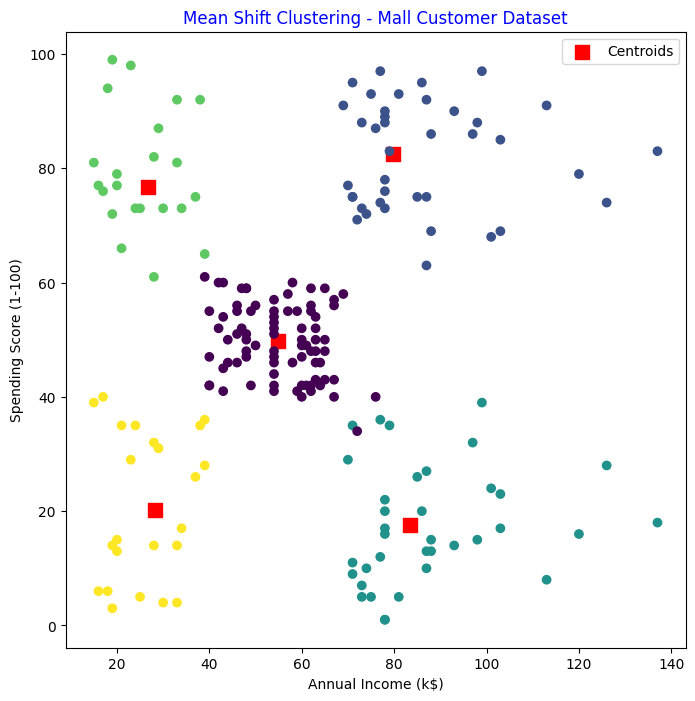

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(msc_cus.cluster_centers_[:, 1], msc_cus.cluster_centers_[:, 2], 
            marker='s', s=100, color='red', label='Centroids')
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mean Shift Clustering - Mall Customer Dataset', color='blue')
plt.legend()
plt.show()

Silhouette Score trung bình: 0.444


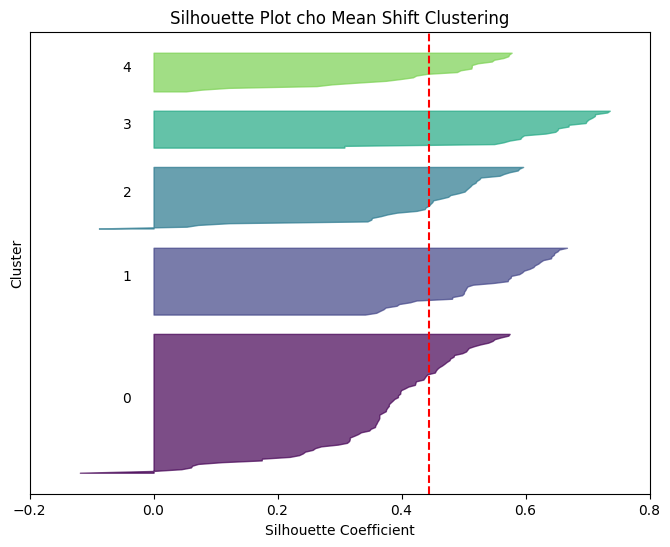

In [18]:
## Tính Silhouette Score cho mô hình
silhouette_avg = silhouette_score(X, msc_cus.labels_)
print(f'Silhouette Score trung bình: {silhouette_avg:.3f}')

## Phân tích Silhouette cho từng mẫu
silhouette_vals = silhouette_samples(X, msc_cus.labels_)

## Vẽ Silhouette Plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[msc_cus.labels_ == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title('Silhouette Plot cho Mean Shift Clustering')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_yticks([])
ax.set_xticks(np.arange(-0.2, 1.0, 0.2))
plt.show()

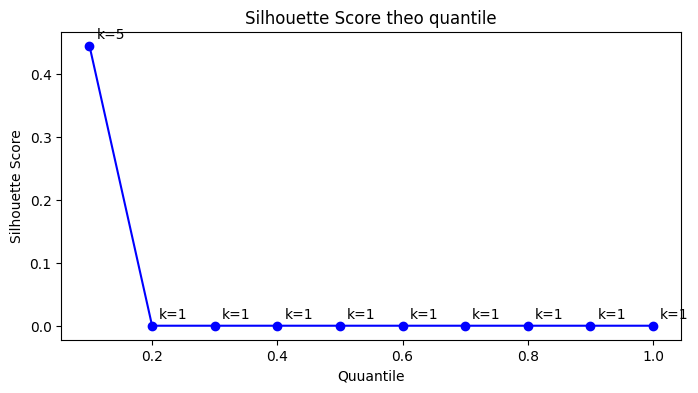

Quantile tối ưu: 0.1


In [19]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
silhouettes = []
n_clusters_list = []

for q in quantiles:
    bandwidth = estimate_bandwidth(X, quantile= q, n_samples= len(X))
    msc_cus = MeanShift(bandwidth= bandwidth, bin_seeding= True)
    msc_cus.fit(X)
    n_clusters = len(np.unique(msc_cus.labels_))
    if n_clusters > 1:
        score = silhouette_score(X, msc_cus.labels_)
        silhouettes.append(score)
        n_clusters_list.append(n_clusters)
    else:
        silhouettes.append(0)
        n_clusters_list.append(n_clusters)

plt.figure(figsize= (8, 4))
plt.plot(quantiles, silhouettes, 'bo-')
for i, txt in enumerate(n_clusters_list):
    plt.annotate(f'k={txt}', (quantiles[i], silhouettes[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Quuantile')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo quantile')
plt.show()
print(f'Quantile tối ưu: {quantiles[np.argmax(silhouettes)]}')